# Noise floor of prototype robot

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy.integrate import cumtrapz
import matplotlib.mlab as mlab

In [2]:
# Just take data with the motor switch power in the off position.  The robot takes data and is not moving.
my_data = np.genfromtxt('DATALOG-noise-floor-1.TXT', delimiter=',')
my_data.shape

(351, 31)

In [5]:
# Duration of data file
t = my_data[:,0] - my_data[0,0]  # in milliseconds
t[-1]

17155.0

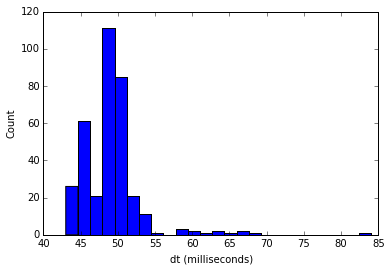

In [4]:
# Histogram of sample period
dt = np.diff(t)
plt.hist(dt,25)
plt.xlabel("dt (milliseconds)")
plt.ylabel("Count")

In [6]:
leftMotorCounter = my_data[:,1]
rightMotorCounter = my_data[:,2]

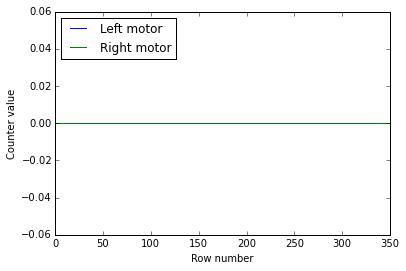

In [7]:
plt.plot(leftMotorCounter-leftMotorCounter[0], label="Left motor")
plt.hold(True)
plt.plot(rightMotorCounter-rightMotorCounter[0], label="Right motor")
plt.legend(loc="upper left")
plt.xlabel("Row number")
plt.ylabel("Counter value")

In [8]:
temp = my_data[:,4][0] # Celsius
eulerX = my_data[:,5]  # deg
eulerY = my_data[:,6]
eulerZ = my_data[:,7]
accelX = my_data[:,8]  # m/s/s
accelY = my_data[:,9]
accelZ = my_data[:,10]
sysCal = my_data[:,11] # 0..3
gyroCal = my_data[:,12]
accelCal = my_data[:,13]
magCal = my_data[:,14]
temp

22.0

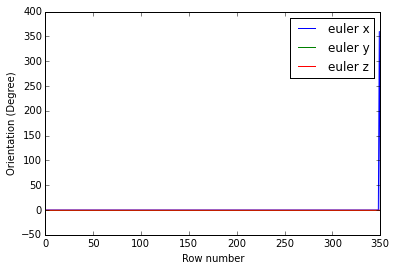

In [847]:
plt.plot(eulerX, label="euler x")
plt.hold(True)
plt.plot(eulerY, label="euler y")
plt.plot(eulerZ, label="euler z")
plt.legend()
plt.xlabel("Row number")
plt.ylabel("Orientation (Degree)")

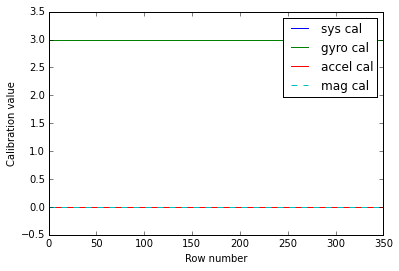

In [9]:
plt.plot(sysCal, label="sys cal")
plt.hold(True)
plt.plot(gyroCal, label="gyro cal")
plt.plot(accelCal, label="accel cal")
plt.plot(magCal, '--', label="mag cal")
plt.legend(loc="upper right")
plt.ylim([-0.5,3.5])
plt.xlabel("Row number")
plt.ylabel("Calibration value")

(351, 16)


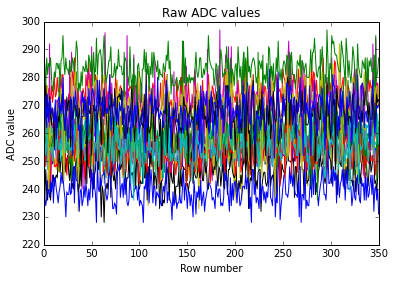

In [10]:
adc = my_data[:,15:]
print adc.shape
plt.plot(adc)
plt.xlabel("Row number")
plt.ylabel("ADC value")
plt.title("Raw ADC values")

In [20]:
# Standard deviations and means
# Ch 0, 1, 2, 3, 7, 9, and 15 are clean
# Ch 4 and 8 are noisy
print adc.shape
adc_mean = np.mean(adc, axis=0)
adc_std = np.std(adc, axis=0)
print adc_mean
print adc_std
adc_std_mm = adc_std * 0.16  # Assuming that there are 0.16 mm per ADC count
print adc_std_mm
print adc_std_mm / np.sqrt(10.)  # Std after averaging 10 points

(351, 16)
[ 253.88319088  259.17948718  274.4045584   261.16809117  258.5014245
  253.17948718  246.03418803  239.48148148  259.44159544  252.57264957
  255.08831909  270.85754986  269.93447293  266.66381766  267.91452991
  283.20797721]
[ 4.2741557   4.66168608  4.46912571  4.61358165  9.76763498  6.05899118
  5.6370745   4.73022338  8.2528684   4.89953118  5.23691208  5.14321324
  7.93662448  6.26124754  6.17813346  4.72002996]
[ 0.68386491  0.74586977  0.71506011  0.73817306  1.5628216   0.96943859
  0.90193192  0.75683574  1.32045894  0.78392499  0.83790593  0.82291412
  1.26985992  1.00179961  0.98850135  0.75520479]
[ 0.21625707  0.23586473  0.22612186  0.23343082  0.49420758  0.3065634
  0.28521592  0.23933248  0.41756578  0.24789885  0.26496912  0.26022829
  0.40156496  0.31679685  0.31259157  0.23881672]


(0, 1)

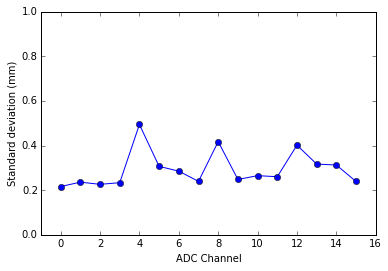

In [27]:
plt.plot(adc_std_mm/np.sqrt(10.), 'o-')
plt.xlabel("ADC Channel")
plt.ylabel("Standard deviation (mm)")
plt.xlim((-1,16))
plt.ylim((0,1))

# Ignore stuff below this line

In [850]:
# # Calibration (only run this code on calibration data)
# adc_0mm = np.mean(adc[30:70], axis=0)
# adc_4p6mm = np.mean(adc[220:300], axis=0)
# adc_over_h = (h_4p6mm-h_0mm)/4.6  # slope: adc counts per millimeter
# h_over_adc = 4.6/(h_4p6mm-h_0mm)  # slope: millimeters per adc count
# print "Raw ADC counts (ch 0 to 15)"
# print adc_0mm
# print "Raw ADC counts with 4.6mm clip board (ch 0 to 15)"
# print adc_4p6mm
# print "ADC counts per millimeter (ch 0 to 15):"
# print adc_over_h
# print "Millimeters per ADC count (ch 0 to 15):"
# print h_over_adc

Raw ADC counts (ch 0 to 15)
[ 246.309    251.82875  265.08475  252.15275  247.945    253.684    249.304
  241.006    252.499    251.72375  252.776    261.895    256.227    250.52175
  246.6695   258.28925]
Raw ADC counts with 4.6mm clip board (ch 0 to 15)
[ 268.676     277.027875  292.49825   281.80225   272.106625  279.667
  276.124875  270.365875  279.612625  279.378125  279.876625  292.097
  283.714125  278.12525   275.786875  288.551625]
ADC counts per millimeter (ch 0 to 15):
[ 4.8623913   5.47807065  5.95945652  6.44554348  5.25252717  5.64847826
  5.830625    6.38258152  5.8942663   6.01182065  5.89144022  6.56565217
  5.97546196  6.00076087  6.32986413  6.57877717]
Millimeters per ADC count (ch 0 to 15):
[ 0.20566012  0.18254602  0.16780054  0.15514596  0.19038455  0.17703883
  0.1715082   0.15667642  0.1696564   0.16633896  0.16973778  0.15230779
  0.16735108  0.16664553  0.15798127  0.15200393]

In [851]:
def adc_to_h(adc):
    '''
    Conversion from ADC value to height in millimeters
    adc = input whose dimensions are (#rows, 16)
    '''
    # Raw ADC counts at 0 mm (ch 0 to 15)
    adc_0mm = [246.30900, 251.82875, 265.08475, 252.15275, 
               247.94500, 253.68400, 249.30400, 241.00600,
               252.49900, 251.72375, 252.77600, 261.89500,
               256.22700, 250.52175, 246.66950, 258.28925]
    # Millimeters per ADC count (ch 0 to 15)
    h_over_adc = [0.20566012, 0.18254602, 0.16780054, 0.15514596,
                  0.19038455, 0.17703883, 0.17150820, 0.15667642,
                  0.16965640, 0.16633896, 0.16973778, 0.15230779,
                  0.16735108, 0.16664553, 0.15798127, 0.15200393]
    h = []
    #adc_0mm = adc[0]  # ????
    for adc_row in adc:  # adc_row.shape = (16,)
        # Sign: increase in ADC is decrease in range
        # Since height is measured from zero, flip sign again
        h.append(h_over_adc * (adc_row - adc_0mm))
    return np.array(h)

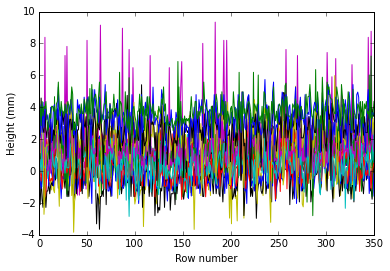

In [852]:
plt.plot(adc_to_h(adc))
plt.xlabel("Row number")
plt.ylabel("Height (mm)")

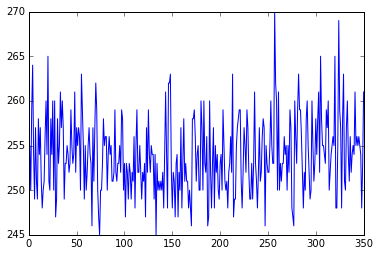

In [853]:
plt.plot(adc[:,0])

## Trajectory using np.roll (assumes constant speed)

In [854]:
print adc.shape

(351, 16)


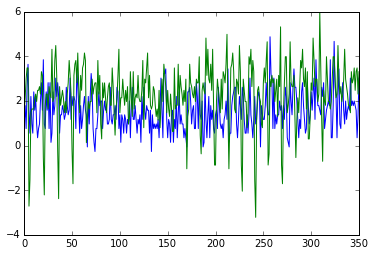

In [860]:
#plt.plot(np.roll(adc_to_h(adc)[:,6],0))


plt.plot(np.roll(adc_to_h(adc)[:,0],0))
#plt.plot(np.roll(adc_to_h(adc)[:,1],0))
#plt.plot(np.roll(adc_to_h(adc)[:,2],0))
#plt.plot(np.roll(adc_to_h(adc)[:,3],0))

#plt.plot(np.roll(adc_to_h(adc)[:,4],0))
#plt.plot(np.roll(adc_to_h(adc)[:,5],0))
#plt.plot(np.roll(adc_to_h(adc)[:,6],0))
#plt.plot(np.roll(adc_to_h(adc)[:,7],-40))

#plt.plot(np.roll(adc_to_h(adc)[:,8],80))
#plt.plot(np.roll(adc_to_h(adc)[:,9],40))
#plt.plot(np.roll(adc_to_h(adc)[:,10],0))
#plt.plot(np.roll(adc_to_h(adc)[:,11],-40))

plt.plot(np.roll(adc_to_h(adc)[:,12],0))
#plt.plot(np.roll(adc_to_h(adc)[:,13],40))
#plt.plot(np.roll(adc_to_h(adc)[:,14],0))
#plt.plot(np.roll(adc_to_h(adc)[:,15],0))

#plt.xlim((800,950))  # bump on ch6 at 875

In [856]:
def rollit(M, delta):
    Mout = []
    for I, m in enumerate(np.transpose(M)):
        Mout.append(np.roll(m, delta * (I%4)))
    return np.transpose(np.array(Mout))

<matplotlib.colorbar.Colorbar instance at 0x147d2fbd8>

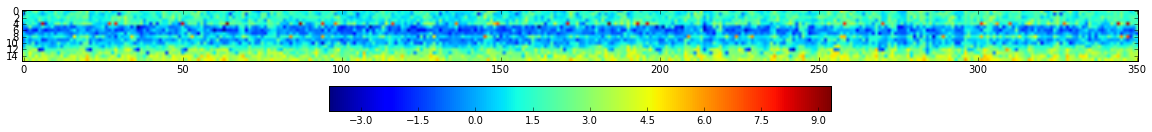

In [857]:
# ADC values (entire data record) without any filtering
plt.figure(figsize=(20, 3))
plt.imshow(np.transpose(adc_to_h(adc)))
#plt.imshow(np.transpose(rollit(adc_to_h(adc),-40)[300:1300,:]),aspect='auto')
#plt.clim((-8.0, 2.0))
plt.colorbar(orientation="horizontal")

(351, 16) (351, 16)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

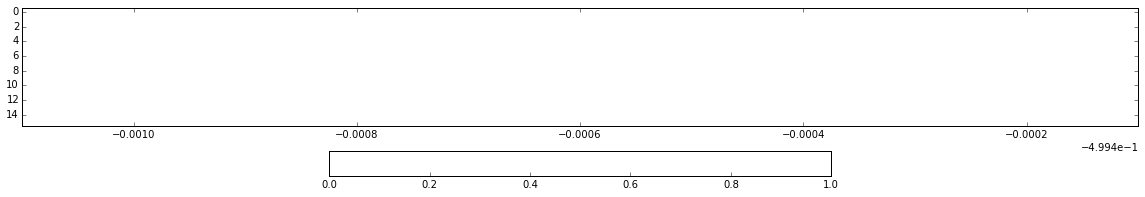

In [858]:
# Use ch[10] as the reference channel
h = adc_to_h(adc)
href = np.transpose(np.tile(h[:,10],(16,1)))
print h.shape, href.shape

plt.figure(figsize=(20, 3))
#plt.imshow(np.transpose(h-href))
plt.imshow(np.transpose((h-href)[800:950,:]), aspect='auto')
plt.colorbar(orientation="horizontal")

## Bandpass filtering

In [ ]:
def bpf(input_signal):
    Wn = [0.05,0.95]  # Wn = 1 is the Nyquist frequency
    N = 8
    b, a = scipy.signal.butter(N, Wn, 'bandpass')
    output_signal = scipy.signal.filtfilt(b, a, input_signal)
    return output_signal
adc_bpf = []
for adc0 in np.transpose(adc):
    adc_bpf.append(bpf(adc0))
adc_bpf = np.transpose(adc_bpf)
print adc.shape, adc_bpf.shape

In [ ]:
plt.plot(adc_bpf[forw])
plt.xlabel("Row number")
plt.ylabel("ADC value (BPF)")

In [ ]:
plt.figure(figsize=(20, 3))
plt.imshow(np.transpose(adc_bpf[forw]))
plt.colorbar(orientation="horizontal")

In [ ]:
# Normalize across a row so that all sensors read the same value
# (Should really use a flat calibration plate for this)
adc_bpf_ref = adc_bpf[0]  # Stopped location
adc_bpf_ref = adc_bpf[forw][0]  # Stopped location
adc_bpf_ref = adc_bpf[forw][9]  # Stopped location
plt.figure(figsize=(20,3))
plt.imshow(np.transpose(adc_bpf[forw]-adc_bpf_ref))
plt.colorbar(orientation="horizontal")

In [ ]:
adc_bpf_ref = adc_bpf[0]  # Stopped location
print adc_bpf_ref

In [ ]:
import IPython
IPython.__version__